In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


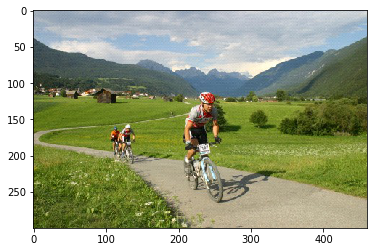

In [2]:
# let start from an image named "bicycle"
image = sc2.utils.image_load("bicycle")
# have a look at the original image
sc2.utils.image_show(image)

In [3]:
# backup the original image first
backup = np.copy(image)

In [4]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.3)

100%|██████████| 137/137 [00:10<00:00, 12.85it/s]


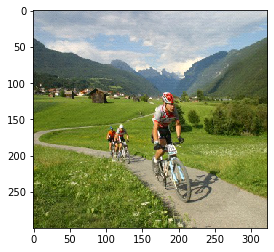

In [5]:
image = np.copy(backup)
# using backward energy
for i in tqdm.tqdm(range(steps - 1)):
    seam = sc2.advanced.seam_by_backward_energy(image)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

100%|██████████| 137/137 [00:13<00:00, 10.02it/s]


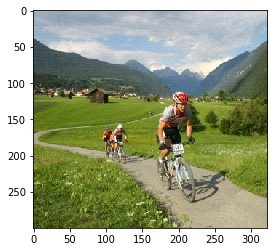

In [6]:
image = np.copy(backup)
# using forward energy
for i in tqdm.tqdm(range(steps - 1)):
    seam = sc2.advanced.seam_by_forward_energy(image)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

In [7]:
# notice that the edges of the mountains are smoother and the player looks better